In [97]:
import numpy as np
import pandas as pd

In [98]:
loan_data_inputs_train = pd.read_csv('../train_loandata_input.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('../train_loandata_target.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('../test_loandata_input.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('../test_loandata_target.csv', index_col = 0)

In [99]:
loan_data_targets_train.shape

(373028, 1)

In [100]:
loan_data_inputs_train.shape

(373028, 324)

In [101]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',                                                          
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [102]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2'
]

In [103]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
96334,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
443947,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
296821,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
449407,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
168807,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [105]:
#reg = LogisticRegression()

In [106]:
#pd.options.display.max_rows = None

In [107]:
#reg.fit(inputs_train, loan_data_targets_train)

In [108]:
#reg.intercept_

In [109]:
#reg.coef_

In [110]:
feature_name = inputs_train.columns.values

In [111]:
# summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# # Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
# summary_table['Coefficients'] = np.transpose(reg.coef_)
# # Creates a new column in the dataframe, called 'Coefficients',
# # with row values the transposed coefficients from the 'LogisticRegression' object.
# summary_table.index = summary_table.index + 1
# # Increases the index of every row of the dataframe with 1.
# summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# # Assigns values of the row with index 0 of the dataframe.
# summary_table = summary_table.sort_index()
# # Sorts the dataframe by index.
# summary_table

## Creating a logistic model with P-Values

In [112]:

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [113]:
reg = LogisticRegression_with_p_values()

In [114]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [115]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()


In [116]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))

In [117]:
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.077604,NaN
1,grade:A,0.388880,1.323392e-05
2,grade:B,0.557535,1.748975e-21
3,grade:C,0.505330,3.469922e-20
4,grade:D,0.426302,6.424969e-16
...,...,...,...
93,mths_since_last_record:3-20,0.869428,3.715601e-12
94,mths_since_last_record:21-31,0.917201,5.856588e-15
95,mths_since_last_record:32-80,1.059585,4.372799e-32
96,mths_since_last_record:81-86,0.737394,6.122403e-12


# PD Model Validation (Test)

In [118]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',                                                          
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [119]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2'
]

In [120]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
184098,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
353407,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
331410,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
222142,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
191622,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [121]:
y_hat_test = reg.model.predict(inputs_test)

In [122]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [123]:
y_hat_test_proba = reg.model.predict_proba(inputs_test)

In [124]:
y_hat_test_proba

array([[0.15992979, 0.84007021],
       [0.18106154, 0.81893846],
       [0.29643335, 0.70356665],
       ...,
       [0.18544258, 0.81455742],
       [0.25041946, 0.74958054],
       [0.06499006, 0.93500994]])

In [125]:
y_hat_test_proba.shape

(93257, 2)

In [126]:
y_hat_test_proba[:][:,1]

array([0.84007021, 0.81893846, 0.70356665, ..., 0.81455742, 0.74958054,
       0.93500994])

In [127]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [128]:
loan_data_targets_test_temp = loan_data_targets_test

In [129]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [130]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [131]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [132]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [133]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
184098,0,0.840070
353407,1,0.818938
331410,1,0.703567
222142,0,0.862280
191622,0,0.827904


## Accuracy and AUC (Area under the curve)

In [134]:
tr = 0.8
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [135]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,2238,8040
1,6902,76077


In [136]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.023998,0.086213
1,0.074011,0.815778


In [137]:
from sklearn.metrics import roc_curve, roc_auc_score

In [138]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

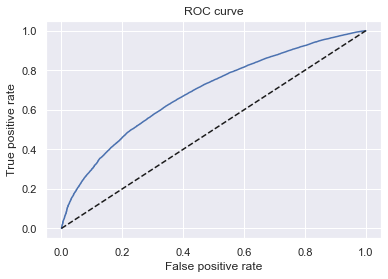

In [140]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [141]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.688825721761692

## Gini Coefficient

In [142]:
Gini = AUROC * 2 - 1
Gini

0.377651443523384

# Creating Scorecard

In [143]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.077604,NaN
1,grade:A,0.388880,1.323392e-05
2,grade:B,0.557535,1.748975e-21
3,grade:C,0.505330,3.469922e-20
4,grade:D,0.426302,6.424969e-16
...,...,...,...
93,mths_since_last_record:3-20,0.869428,3.715601e-12
94,mths_since_last_record:21-31,0.917201,5.856588e-15
95,mths_since_last_record:32-80,1.059585,4.372799e-32
96,mths_since_last_record:81-86,0.737394,6.122403e-12


In [144]:
y_hat_test_proba

array([0.84007021, 0.81893846, 0.70356665, ..., 0.81455742, 0.74958054,
       0.93500994])

In [145]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,int_rate:>20.281,0,NaN
9,mths_since_earliest_cr_line:<140,0,NaN


In [146]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.077604,NaN
1,1,grade:A,0.388880,1.323392e-05
2,2,grade:B,0.557535,1.748975e-21
3,3,grade:C,0.505330,3.469922e-20
4,4,grade:D,0.426302,6.424969e-16
...,...,...,...,...
114,16,total_rev_hi_lim:<=5K,0.000000,NaN
115,17,annual_inc:<20K,0.000000,NaN
116,18,dti:>35,0.000000,NaN
117,19,mths_since_last_delinq:0-3,0.000000,NaN


In [147]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.077604,NaN,Intercept
1,1,grade:A,0.388880,1.323392e-05,grade
2,2,grade:B,0.557535,1.748975e-21,grade
3,3,grade:C,0.505330,3.469922e-20,grade
4,4,grade:D,0.426302,6.424969e-16,grade
...,...,...,...,...,...
114,16,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim
115,17,annual_inc:<20K,0.000000,NaN,annual_inc
116,18,dti:>35,0.000000,NaN,dti
117,19,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq


In [148]:
min_score = 300
max_score = 850

In [149]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.077604
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.004361
delinq_2yrs                   -0.091172
dti                           -0.312739
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line   -0.204756
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
open_acc                      -0.125031
pub_rec                        0.000000
purpose                        0.000000
term                           0.000000
total_acc                     -0.044665
total_rev_hi_lim               0.000000
verification_status            0.000000
Name: Coefficients, dtype: float64

In [150]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.8603271977830336

In [151]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.077604
acc_now_delinq                 0.218263
addr_state                     0.485507
annual_inc                     0.570966
delinq_2yrs                    0.000000
dti                            0.000000
emp_length                     0.120662
grade                          0.557535
home_ownership                 0.116977
initial_list_status            0.271090
inq_last_6mths                 0.936431
int_rate                       1.513369
mths_since_earliest_cr_line    0.000000
mths_since_last_delinq         0.154574
mths_since_last_record         1.059585
open_acc                       0.000000
pub_rec                        0.135324
purpose                        0.395136
term                           0.091348
total_acc                      0.000000
total_rev_hi_lim               0.560428
verification_status            0.138353
Name: Coefficients, dtype: float64

In [152]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

6.2479433915448475

In [153]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.077604,NaN,Intercept,-73.095986
1,1,grade:A,0.388880,1.323392e-05,grade,26.378485
2,2,grade:B,0.557535,1.748975e-21,grade,37.818710
3,3,grade:C,0.505330,3.469922e-20,grade,34.277512
4,4,grade:D,0.426302,6.424969e-16,grade,28.916883
...,...,...,...,...,...,...
114,16,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim,0.000000
115,17,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
116,18,dti:>35,0.000000,NaN,dti,0.000000
117,19,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [154]:
#Intercept
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.077604,NaN,Intercept,353.093680
1,1,grade:A,0.388880,1.323392e-05,grade,26.378485
2,2,grade:B,0.557535,1.748975e-21,grade,37.818710
3,3,grade:C,0.505330,3.469922e-20,grade,34.277512
4,4,grade:D,0.426302,6.424969e-16,grade,28.916883
...,...,...,...,...,...,...
114,16,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim,0.000000
115,17,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
116,18,dti:>35,0.000000,NaN,dti,0.000000
117,19,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [155]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.077604,NaN,Intercept,353.093680,353.0
1,1,grade:A,0.388880,1.323392e-05,grade,26.378485,26.0
2,2,grade:B,0.557535,1.748975e-21,grade,37.818710,38.0
3,3,grade:C,0.505330,3.469922e-20,grade,34.277512,34.0
4,4,grade:D,0.426302,6.424969e-16,grade,28.916883,29.0
...,...,...,...,...,...,...,...
114,16,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim,0.000000,0.0
115,17,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
116,18,dti:>35,0.000000,NaN,dti,0.000000,0.0
117,19,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


In [156]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

301.0

In [157]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

850.0

In [158]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.077604,NaN,Intercept,353.093680,353.0,-0.093680
1,1,grade:A,0.388880,1.323392e-05,grade,26.378485,26.0,-0.378485
2,2,grade:B,0.557535,1.748975e-21,grade,37.818710,38.0,0.181290
3,3,grade:C,0.505330,3.469922e-20,grade,34.277512,34.0,-0.277512
4,4,grade:D,0.426302,6.424969e-16,grade,28.916883,29.0,0.083117
...,...,...,...,...,...,...,...,...
114,16,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim,0.000000,0.0,0.000000
115,17,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000
116,18,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000
117,19,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000


In [159]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

/Users/ankitbharali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.077604,NaN,Intercept,353.093680,353.0,-0.093680,353.0
1,1,grade:A,0.388880,1.323392e-05,grade,26.378485,26.0,-0.378485,26.0
2,2,grade:B,0.557535,1.748975e-21,grade,37.818710,38.0,0.181290,38.0
3,3,grade:C,0.505330,3.469922e-20,grade,34.277512,34.0,-0.277512,34.0
4,4,grade:D,0.426302,6.424969e-16,grade,28.916883,29.0,0.083117,29.0
...,...,...,...,...,...,...,...,...,...
114,16,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim,0.000000,0.0,0.000000,0.0
115,17,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.0
116,18,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.0
117,19,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.0


## Calculating Credit Score

In [160]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
184098,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
353407,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
331410,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
222142,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
191622,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [161]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.077604,NaN,Intercept,353.093680,353.0,-0.093680,353.0
1,1,grade:A,0.388880,1.323392e-05,grade,26.378485,26.0,-0.378485,26.0
2,2,grade:B,0.557535,1.748975e-21,grade,37.818710,38.0,0.181290,38.0
3,3,grade:C,0.505330,3.469922e-20,grade,34.277512,34.0,-0.277512,34.0
4,4,grade:D,0.426302,6.424969e-16,grade,28.916883,29.0,0.083117,29.0
...,...,...,...,...,...,...,...,...,...
114,16,total_rev_hi_lim:<=5K,0.000000,NaN,total_rev_hi_lim,0.000000,0.0,0.000000,0.0
115,17,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.0
116,18,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.0
117,19,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.0


In [162]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [163]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
184098,1,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
353407,1,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
331410,1,0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
222142,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
191622,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [164]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [165]:
scorecard_scores = df_scorecard['Score - Final']

In [166]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 119)

In [167]:
scorecard_scores.shape

(119,)

In [168]:
scorecard_scores = scorecard_scores.values.reshape(119, 1)

In [169]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

## Setting Cut-offs

In [170]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [171]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7433,2845
1,37534,45445


In [172]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079704,0.030507
1,0.402479,0.487309


In [173]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

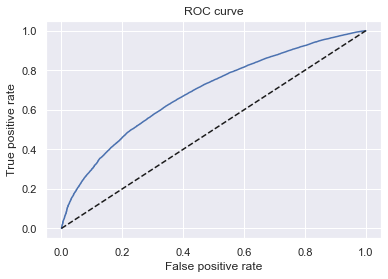

In [175]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [178]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.991915,0.000000,0.000012
2,0.990147,0.000000,0.000084
3,0.989735,0.000097,0.000084
4,0.988854,0.000097,0.000169


In [180]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2918.0
1,0.991915,0.000000,0.000012,752.0
2,0.990147,0.000000,0.000084,739.0
3,0.989735,0.000097,0.000084,736.0
4,0.988854,0.000097,0.000169,730.0


In [181]:
df_cutoffs['Score'][0] = max_score

In [182]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [183]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [186]:
df_cutoffs

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.991915,0.000000,0.000012,752.0,1,93256,0.000011,0.999989
2,0.990147,0.000000,0.000084,739.0,7,93250,0.000075,0.999925
3,0.989735,0.000097,0.000084,736.0,8,93249,0.000086,0.999914
4,0.988854,0.000097,0.000169,730.0,15,93242,0.000161,0.999839
...,...,...,...,...,...,...,...,...
17567,0.466903,0.999611,0.999964,417.0,93250,7,0.999925,0.000075
17568,0.452523,0.999805,0.999964,413.0,93252,5,0.999946,0.000054
17569,0.429416,0.999805,0.999988,407.0,93254,3,0.999968,0.000032
17570,0.419429,1.000000,0.999988,404.0,93256,1,0.999989,0.000011


In [187]:
df_scorecard.to_csv('df_scorecard.csv')

In [188]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')